# Step 1 : Import the Package & Load the Data

In [220]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import plotly.offline as pyo
import warnings
import pickle
import joblib
warnings.filterwarnings("ignore")
%matplotlib inline

In [221]:
df = pd.read_csv("Final_Data.csv")
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,family,name
0,p,11.46,x,h,o,f,e,NaN,w,17.56,...,w,u,w,t,g,NaN,d,w,Amanita Family,Fly Agaric
1,p,11.46,x,h,o,f,e,NaN,w,17.56,...,w,u,w,t,g,NaN,d,w,Amanita Family,False Panther Cap
2,p,11.46,x,h,o,f,e,NaN,w,17.56,...,w,u,w,t,g,NaN,d,w,Russula Family,Fleecy Milk Cap
3,p,11.17,x,h,o,f,e,NaN,w,16.44,...,w,u,w,t,g,NaN,d,a,Amanita Family,Fly Agaric
4,p,11.17,x,h,o,f,e,NaN,w,16.44,...,w,u,w,t,g,NaN,d,a,Amanita Family,False Panther Cap


**we dont use Family & name so we drop the column**

In [222]:
df.drop(columns=["family" , "name"] , axis =1 , inplace = True)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,11.46,x,h,o,f,e,NaN,w,17.56,...,s,y,w,u,w,t,g,NaN,d,w
1,p,11.46,x,h,o,f,e,NaN,w,17.56,...,s,y,w,u,w,t,g,NaN,d,w
2,p,11.46,x,h,o,f,e,NaN,w,17.56,...,s,y,w,u,w,t,g,NaN,d,w
3,p,11.17,x,h,o,f,e,NaN,w,16.44,...,s,y,w,u,w,t,g,NaN,d,a
4,p,11.17,x,h,o,f,e,NaN,w,16.44,...,s,y,w,u,w,t,g,NaN,d,a


In [223]:
df.shape

(502863, 21)

# Step 2 : Data Preprocess & EDA

### Checking Duplicate & Null Values
- Duplicate makes the Model overfit
- In ML general Threshold we put 30% more missing data we drop the column

In [7]:
print("Duplicate Data Check : ")
df.duplicated().sum() 

Duplicate Data Check : 


448167

In [9]:
print(f"Overall Duplicate Records  : {df.duplicated().sum()} and  Percentage : {df.duplicated().sum()/len(df) *100 }%")

Overall Duplicate Records  : 448167 and  Percentage : 89.12308123683786%


**We delete the Duplicate records**

In [224]:
df.drop_duplicates(inplace=True)
df.shape

(54696, 21)

In [225]:
print("Duplicate Data Check : ")
df.duplicated().sum() 

Duplicate Data Check : 


0

In [93]:
print("Null Data Check : ")
(df.isnull().sum()) / len(df) * 100

Null Data Check : 


class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.402077
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         17.065233
gill-spacing            40.218663
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               85.810663
stem-surface            61.790625
stem-color               0.000000
veil-type               95.645020
veil-color              88.847448
has-ring                 0.000000
ring-type                4.111818
spore-print-color       89.330116
habitat                  0.000000
season                   0.000000
dtype: float64

In [12]:
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a horizontal bar plot using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    y=null_percentage.index,
    x=null_percentage.values,
    orientation='h',
    marker_color='rgb(255, 80, 80)',
    text=null_percentage.values.round(2),
    textposition='inside',
    textfont_size= 80
))

# Customize the layout
fig.update_layout(
    title='Percentage of Null Values in Each Column',
    xaxis_title='Percentage',
    yaxis_title='Columns',
    xaxis=dict(range=[0, 100]), 
    yaxis=dict(dtick=1), 
    height=1000,  
    margin=dict(l=150),  
)

fig.show()

In [ ]:
pyo.plot(fig, filename='Visualization/null_values_graph.html')

'Visualization/null_values_graph.html'

### Dropping the Columns
- So the Dropped Columns based on the threshold  are : ["gill-spacing" , "stem-root" , "stem-surface" , "veil-type" , "veil-color" , "spore-print-color"]

In [226]:
df.drop(columns=["gill-spacing" , "stem-root" , "stem-surface" , "veil-type" , "veil-color" , "spore-print-color"] , inplace= True)
df.shape

(54696, 15)

In [14]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,11.46,x,h,o,f,e,w,17.56,18.39,w,t,g,d,w
3,p,11.17,x,h,o,f,e,w,16.44,16.12,w,t,g,d,a
6,p,11.35,x,h,e,f,e,w,16.96,15.39,w,t,p,d,a
9,p,11.02,f,g,o,f,e,w,15.98,16.02,w,t,g,d,u
12,p,12.00,f,g,e,f,e,w,15.90,16.23,w,t,g,d,u


### Check Imbalance Data

In [15]:
df["class"].value_counts()

class
p    29675
e    25021
Name: count, dtype: int64

In [16]:
print(f"Percentage wise Classes :")
(df["class"].value_counts() / len(df))*100

Percentage wise Classes :


class
p    54.254424
e    45.745576
Name: count, dtype: float64

In [19]:
class_df = pd.DataFrame({
    'Values': ['Poison', 'Edible'],
    'Percentages': [54.2, 45.7]
})

fig = px.bar(class_df, x='Values', y='Percentages', text='Percentages',
             labels={'Percentages': 'Percentages'},
            )


fig.update_layout(title='Values as Percentages of Total (100%)', xaxis_title='', yaxis_title='Percentage', height=800)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside', textfont_size=16)


fig.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54696 entries, 0 to 502862
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 54696 non-null  object 
 1   cap-diameter          54696 non-null  float64
 2   cap-shape             54696 non-null  object 
 3   cap-surface           41896 non-null  object 
 4   cap-color             54696 non-null  object 
 5   does-bruise-or-bleed  54696 non-null  object 
 6   gill-attachment       45362 non-null  object 
 7   gill-color            54696 non-null  object 
 8   stem-height           54696 non-null  float64
 9   stem-width            54696 non-null  float64
 10  stem-color            54696 non-null  object 
 11  has-ring              54696 non-null  object 
 12  ring-type             52447 non-null  object 
 13  habitat               54696 non-null  object 
 14  season                54696 non-null  object 
dtypes: float64(3), object(1

In [21]:
df.isnull().sum() / len(df) *100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.402077
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         17.065233
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-color               0.000000
has-ring                 0.000000
ring-type                4.111818
habitat                  0.000000
season                   0.000000
dtype: float64

In [22]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,11.46,x,h,o,f,e,w,17.56,18.39,w,t,g,d,w
3,p,11.17,x,h,o,f,e,w,16.44,16.12,w,t,g,d,a
6,p,11.35,x,h,e,f,e,w,16.96,15.39,w,t,p,d,a
9,p,11.02,f,g,o,f,e,w,15.98,16.02,w,t,g,d,u
12,p,12.00,f,g,e,f,e,w,15.90,16.23,w,t,g,d,u


**All 3 missing Columns are Categorical so we impute with mode**

In [7]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             12800
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9334
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2249
habitat                     0
season                      0
dtype: int64

In [6]:
df["cap-surface"].value_counts()

cap-surface
t    7197
s    6574
y    5934
g    4427
h    4386
d    4099
w    2124
e    2070
i    2033
k    1751
l    1301
Name: count, dtype: int64

In [8]:
12800/4

3200.0

In [227]:
capSurface_index = df[df["cap-surface"].isnull()].index
capSurface_index.shape

(12800,)

**Equally spread for top 5**

In [229]:
t_mode = capSurface_index[:3100]
s_mode = capSurface_index[3100:6100]
y_mode = capSurface_index[6100:8600]
g_mode = capSurface_index[8600 : 10600]
h_mode = capSurface_index[10600 :12100]
d_mode = capSurface_index[12100:]

In [230]:
df.loc[t_mode , "cap-surface"] = "t"
df.loc[s_mode , "cap-surface"] = "s"
df.loc[y_mode , "cap-surface"] = "y"
df.loc[g_mode , "cap-surface"] = "g"
df.loc[h_mode , "cap-surface"] = "h"
df.loc[d_mode , "cap-surface"] = "d"

In [231]:
df["cap-surface"].value_counts()

cap-surface
t    10297
s     9574
y     8434
g     6427
h     5886
d     4799
w     2124
e     2070
i     2033
k     1751
l     1301
Name: count, dtype: int64

**Gill attachment**

In [232]:
df["gill-attachment"].value_counts()

gill-attachment
a    12073
d     8591
x     6961
s     5065
p     4774
e     4599
f     3299
Name: count, dtype: int64

In [233]:
gill_attachment_index = df[df["gill-attachment"].isnull()].index
gill_attachment_index.shape

(9334,)

In [234]:
a_mode = gill_attachment_index[:3000]
d_mode = gill_attachment_index[3000:6000]
x_mode = gill_attachment_index[6000:9000]
s_mode = gill_attachment_index[9000:]

In [235]:
df.loc[a_mode , "gill-attachment"] = "a"
df.loc[d_mode , "gill-attachment"] = "d"
df.loc[x_mode , "gill-attachment"] = "x"
df.loc[s_mode , "gill-attachment"] = "s"

In [236]:
df["gill-attachment"].value_counts()

gill-attachment
a    15073
d    11591
x     9961
s     5399
p     4774
e     4599
f     3299
Name: count, dtype: int64

**Ring-type**

In [237]:
df["ring-type"].value_counts()

ring-type
f    43686
e     2120
z     2109
l     1315
r     1239
p      821
g      804
m      353
Name: count, dtype: int64

**Impute ring type**

In [34]:
df[df["ring-type"].isnull()]["has-ring"].value_counts()   

has-ring
t    2249
Name: count, dtype: int64

**All the values are true we fill with mode if its false(f) we use f**

In [35]:
df["ring-type"].value_counts()

ring-type
f    43686
e     2120
z     2109
l     1315
r     1239
p      821
g      804
m      353
Name: count, dtype: int64

**we cannot use false we use z and e where these are the top two**

In [30]:
df["ring-type"].isnull().sum()

2249

In [238]:
ring_index = df[df["ring-type"].isnull()].index
z_mode = ring_index[:1000]
e_mode = ring_index[1000:2000]
r_mode = ring_index[2000:]

In [239]:
df.loc[z_mode , "ring-type"] = "z"
df.loc[e_mode , "ring-type"] = "e"
df.loc[r_mode , "ring-type"] = "r"

In [103]:
df["ring-type"].value_counts()

ring-type
f    43686
e     3120
z     3109
r     1488
l     1315
p      821
g      804
m      353
Name: count, dtype: int64

In [240]:
print("Null Data Check : ")
(df.isnull().sum()) / len(df) * 100

Null Data Check : 


class                   0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64

## Checking Outliers

In [109]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,11.46,x,h,o,f,e,w,17.56,18.39,w,t,g,d,w
3,p,11.17,x,h,o,f,e,w,16.44,16.12,w,t,g,d,a
6,p,11.35,x,h,e,f,e,w,16.96,15.39,w,t,p,d,a
9,p,11.02,f,g,o,f,e,w,15.98,16.02,w,t,g,d,u
12,p,12.00,f,g,e,f,e,w,15.90,16.23,w,t,g,d,u


In [36]:
df.describe()

,cap-diameter,stem-height,stem-width
count,54696.000000,54696.000000,54696.000000
mean,6.121649,6.392641,11.040549
std,5.070500,3.280002,9.536469
min,0.380000,0.000000,0.000000
25%,3.300000,4.530000,4.630000
50%,5.320000,5.810000,8.890000
75%,7.650000,7.450000,14.690000
max,62.340000,33.920000,103.910000


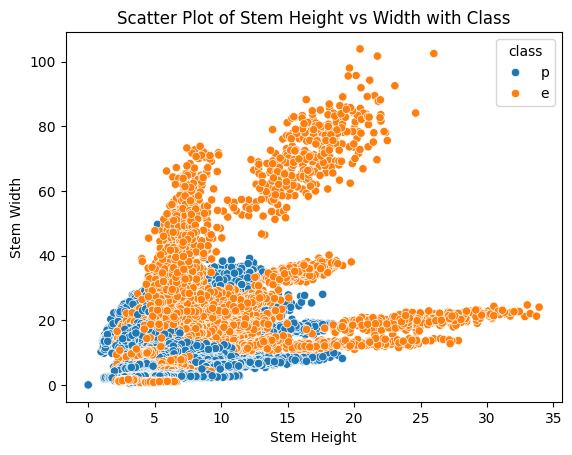

In [37]:
sns.scatterplot(data = df , x = "stem-height" , y= "stem-width" , hue = "class")
plt.xlabel("Stem Height")
plt.ylabel("Stem Width")
plt.title("Scatter Plot of Stem Height vs Width with Class")
plt.show()

In [ ]:
plt.savefig("Stem HeightvsWidth.png")

<Figure size 640x480 with 0 Axes>

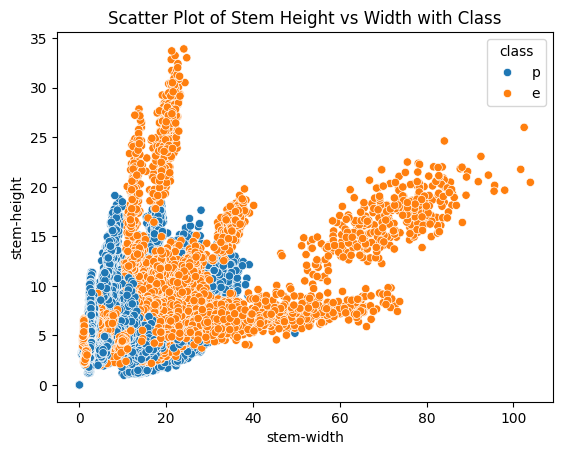

In [38]:
sns.scatterplot(data = df , x = "stem-width" , y= "stem-height" , hue = "class")
plt.xlabel("stem-width")
plt.ylabel("stem-height")
plt.title("Scatter Plot of Stem Height vs Width with Class")
plt.show()

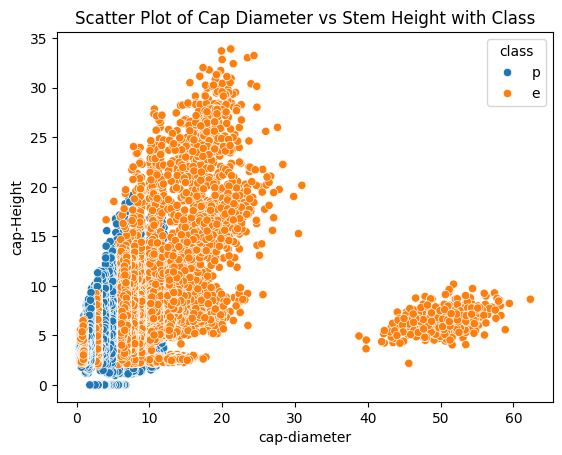

In [39]:
sns.scatterplot(data = df , x = "cap-diameter" ,  y = "stem-height", hue = "class")
plt.xlabel("cap-diameter")
plt.ylabel("cap-Height")
plt.title("Scatter Plot of Cap Diameter vs Stem Height with Class")
plt.show()

**Use Box Plot**

<Axes: xlabel='cap-diameter'>

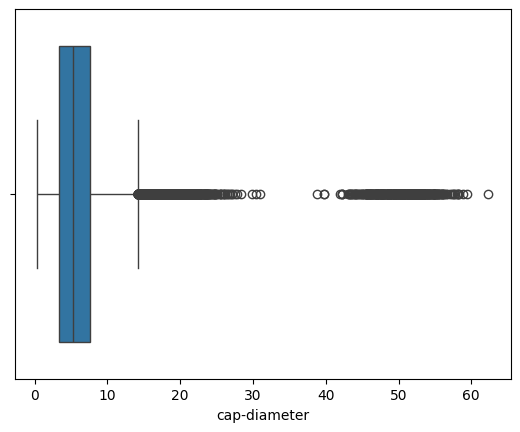

In [40]:
sns.boxplot(data = df , x= "cap-diameter" )

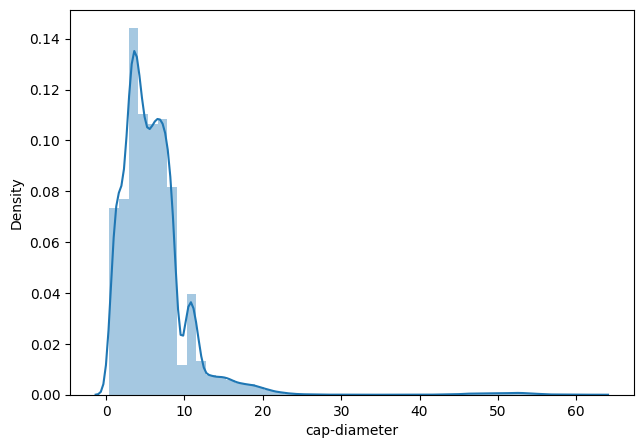

In [41]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["cap-diameter"])
plt.show()

**Use IQR Calculation**

In [42]:
percent_25 = df["cap-diameter"].quantile(0.25)
percent_75 = df["cap-diameter"].quantile(0.75)
IQR = percent_75 - percent_25
print(f"25th Percentile of cap-diameter is : {percent_25}")
print()
print(f"75th Percentile of cap-diameter is : {percent_75}")
print()
print(f"IQR of cap-diameter is : {IQR}")

25th Percentile of cap-diameter is : 3.3

75th Percentile of cap-diameter is : 7.65

IQR of cap-diameter is : 4.3500000000000005


In [43]:
lower_limit  = percent_25 - 1.5 * IQR
upper_limit = percent_75 + 1.5 * IQR
print(f"Lower Limit of cap-diameter is : {lower_limit}")
print()
print(f"Upper Limit of cap-diameter is : {upper_limit}")

Lower Limit of cap-diameter is : -3.2250000000000005

Upper Limit of cap-diameter is : 14.175


In [44]:
cap_outlier_data = df[(df["cap-diameter"] < lower_limit) | (df["cap-diameter"] > upper_limit)]
cap_outlier_data.shape

(2226, 15)

In [45]:
len(cap_outlier_data)/len(df) ## 4 Percent Data are Outliers

0.040697674418604654

In [46]:
cap_outlier_data["class"].value_counts()

class
e    2226
Name: count, dtype: int64

In [48]:
df["class"].value_counts()

class
p    29675
e    25021
Name: count, dtype: int64

**Already Edible is low but in the outlier data Edible are high in count we cant remove that make imbalance of data better we use transformation**

In [49]:
df[(df["cap-diameter"] < lower_limit)]  ## No Data in Lowe Limit

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season


**So all the Outlier Data are in upper limit**

In [51]:
# Calculate the correlation matrix for all variables
correlation_matrix = df[["cap-diameter" , "stem-height" , "stem-width"]].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              cap-diameter  stem-height  stem-width
cap-diameter      1.000000     0.427229    0.654625
stem-height       0.427229     1.000000    0.471897
stem-width        0.654625     0.471897    1.000000


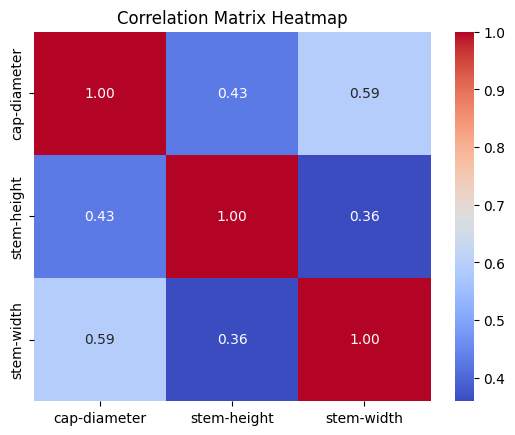

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## We Conclude that the Cap-Diameter is Higher then its Edible
we cant  Drop Better we use capping technique to make values within 25

In [52]:
df.describe()

,cap-diameter,stem-height,stem-width
count,54696.000000,54696.000000,54696.000000
mean,6.121649,6.392641,11.040549
std,5.070500,3.280002,9.536469
min,0.380000,0.000000,0.000000
25%,3.300000,4.530000,4.630000
50%,5.320000,5.810000,8.890000
75%,7.650000,7.450000,14.690000
max,62.340000,33.920000,103.910000


**Column Transformation**

In [53]:
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats

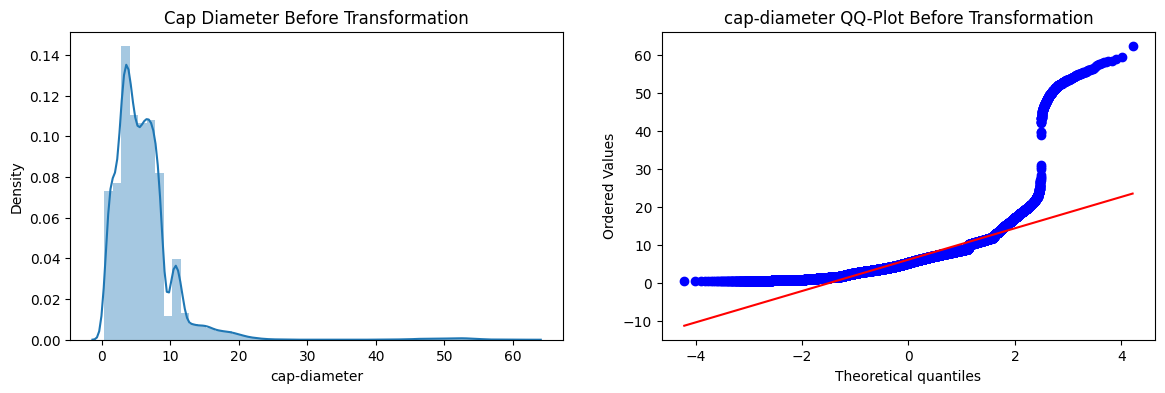

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['cap-diameter'])
plt.title("Cap Diameter Before Transformation")

plt.subplot(1,2,2)
stats.probplot(df['cap-diameter'], dist="norm", plot=plt)
plt.title("cap-diameter QQ-Plot Before Transformation")

plt.show()

In [55]:
diameter_transform = FunctionTransformer(func=np.log1p)
df["cap-diameter_log"] = diameter_transform.fit_transform(df["cap-diameter"])

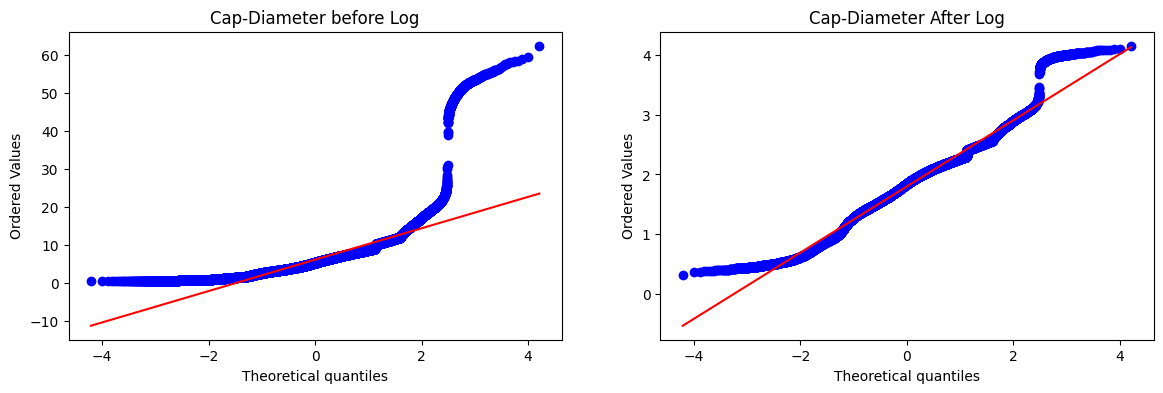

In [56]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
stats.probplot(df["cap-diameter"], dist="norm", plot=plt)
plt.title("Cap-Diameter before Log")

plt.subplot(1,2,2)
stats.probplot(df["cap-diameter_log"] , dist="norm", plot=plt)
plt.title("Cap-Diameter After Log")

plt.show()

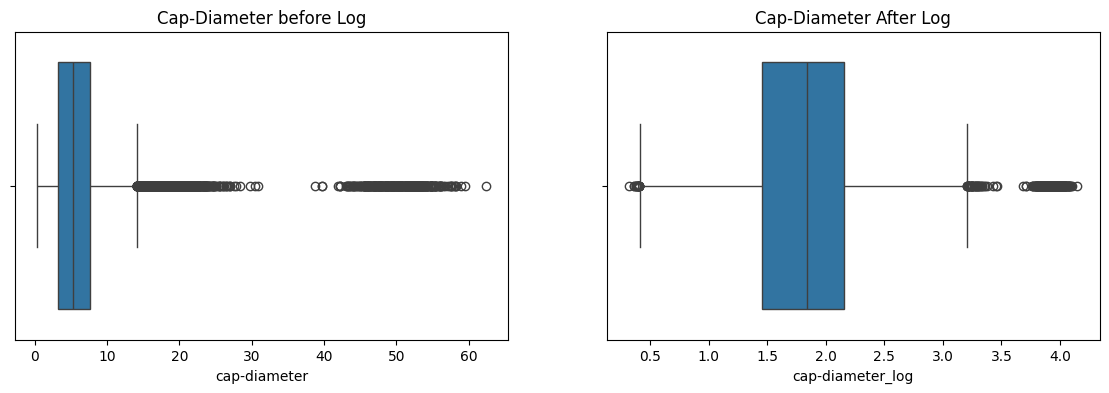

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x = df["cap-diameter"])
plt.title("Cap-Diameter before Log")

plt.subplot(1,2,2)
sns.boxplot(x = df["cap-diameter_log"])
plt.title("Cap-Diameter After Log")

plt.show()

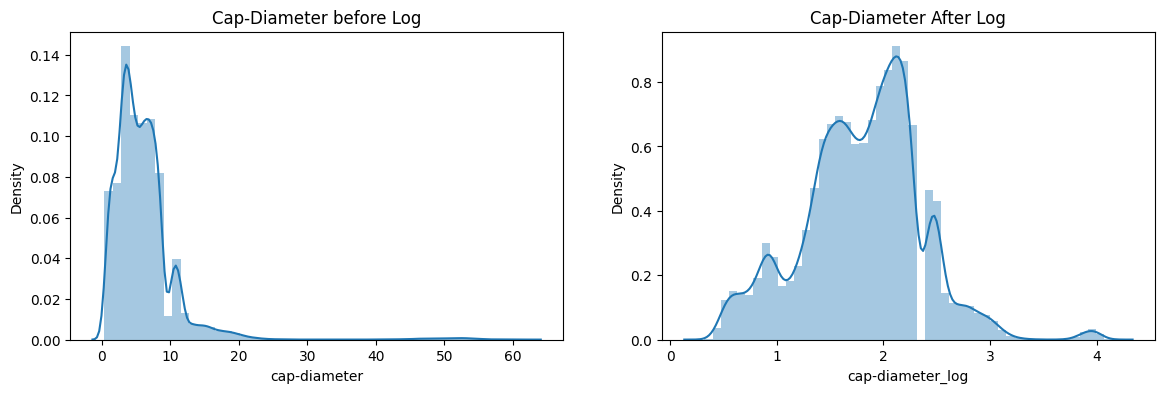

In [58]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.distplot(df["cap-diameter"])
plt.title("Cap-Diameter before Log")

plt.subplot(1,2,2)
sns.distplot(df["cap-diameter_log"])
plt.title("Cap-Diameter After Log")

plt.show()

In [ ]:
diameter_transform.transform([45])

array([3.8286414])

In [468]:
df["cap-diameter"] = df["cap-diameter_log"]
df.drop(columns=["cap-diameter_log"] , axis = 1 , inplace = True)

**use Stem Width & Stem Height**

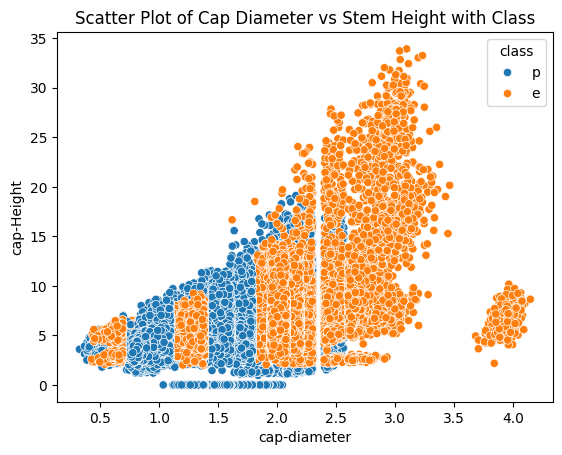

In [59]:
sns.scatterplot(data = df , x = "cap-diameter_log" ,  y = "stem-height", hue = "class")
plt.xlabel("cap-diameter")
plt.ylabel("cap-Height")
plt.title("Scatter Plot of Cap Diameter vs Stem Height with Class")
plt.show()

In [60]:
df.describe()

,cap-diameter,stem-height,stem-width,cap-diameter_log
count,54696.000000,54696.000000,54696.000000,54696.000000
mean,6.121649,6.392641,11.040549,1.801245
std,5.070500,3.280002,9.536469,0.556825
min,0.380000,0.000000,0.000000,0.322083
25%,3.300000,4.530000,4.630000,1.458615
50%,5.320000,5.810000,8.890000,1.843719
75%,7.650000,7.450000,14.690000,2.157559
max,62.340000,33.920000,103.910000,4.148517


**Now Check with Stem Height & Stem Width**

<Axes: xlabel='stem-width'>

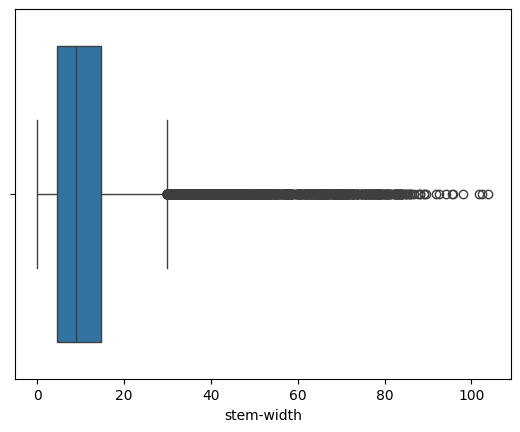

In [61]:
sns.boxplot(data = df , x= "stem-width")

<Axes: xlabel='stem-height'>

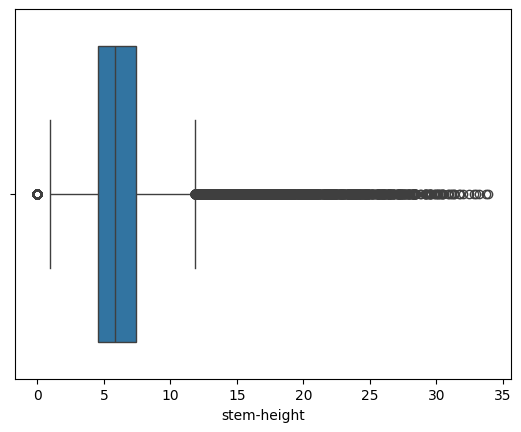

In [62]:
sns.boxplot(data = df , x= "stem-height")

In [63]:
s_height_transform = FunctionTransformer(func=np.log1p)
df["stem_height_log"] = s_height_transform.fit_transform(df["stem-height"])

s_width_transform = FunctionTransformer(func=np.log1p)
df["stem_width_log"] = s_width_transform.fit_transform(df["stem-width"])

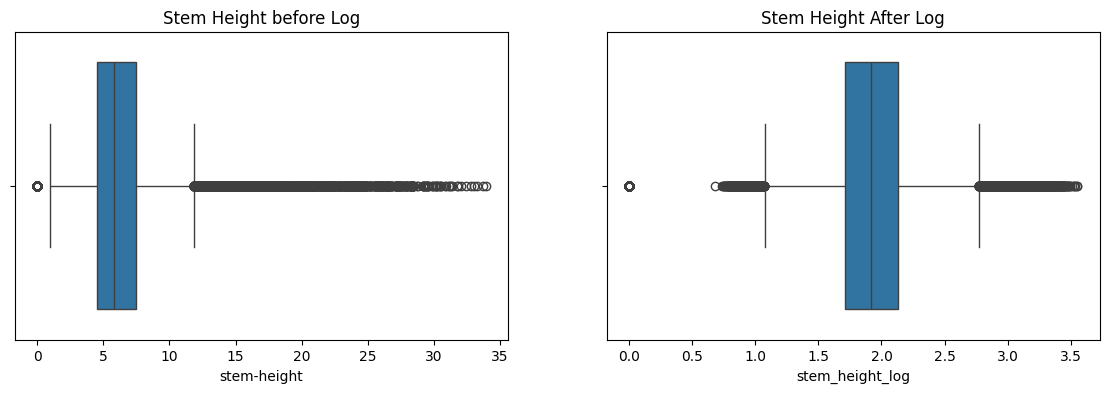

In [64]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x = df["stem-height"])
plt.title("Stem Height before Log")

plt.subplot(1,2,2)
sns.boxplot(x = df["stem_height_log"])
plt.title("Stem Height After Log")

plt.show()

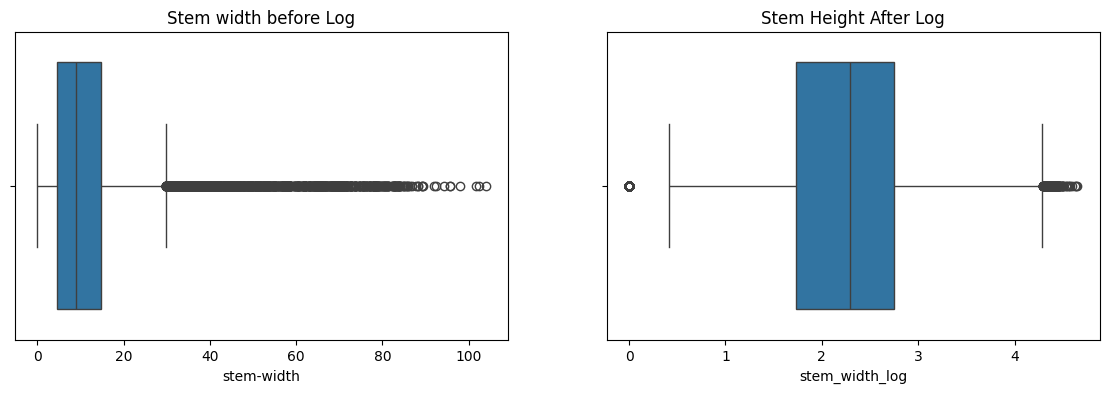

In [65]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x = df["stem-width"])
plt.title("Stem width before Log")

plt.subplot(1,2,2)
sns.boxplot(x = df["stem_width_log"])
plt.title("Stem Height After Log")

plt.show()

**Still Using Column Transformation(Log Transformation) we couldnt reduce the Outliers so we traditional IQR way**

In [66]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season', 'cap-diameter_log', 'stem_height_log', 'stem_width_log'],
      dtype='object')

In [85]:
df.drop(columns=["cap-diameter_log" , "stem_height_log" , "stem_width_log"] , axis = 1 , inplace = True)
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')

**Cap-Diameter IQR**

In [241]:
percent_25 = df["cap-diameter"].quantile(0.25)
percent_75 = df["cap-diameter"].quantile(0.75)
IQR = percent_75 - percent_25
print(f"25th Percentile of cap-diameter is : {percent_25}")
print()
print(f"75th Percentile of cap-diameter is : {percent_75}")
print()
print(f"IQR of cap-diameter is : {IQR}")

25th Percentile of cap-diameter is : 3.3

75th Percentile of cap-diameter is : 7.65

IQR of cap-diameter is : 4.3500000000000005


In [242]:
lower_limit  = percent_25 - 1.5 * IQR
upper_limit = percent_75 + 1.5 * IQR
print(f"Lower Limit of cap-diameter is : {lower_limit}")
print()
print(f"Upper Limit of cap-diameter is : {upper_limit}")

Lower Limit of cap-diameter is : -3.2250000000000005

Upper Limit of cap-diameter is : 14.175


In [243]:
df["cap_diameter"] = np.where(df["cap-diameter"] > upper_limit , upper_limit , 
                          np.where(df["cap-diameter"] < lower_limit , lower_limit , 
                          df["cap-diameter"] ))
df.describe()

,cap-diameter,stem-height,stem-width,cap_diameter
count,54696.000000,54696.000000,54696.000000,54696.000000
mean,6.121649,6.392641,11.040549,5.777131
std,5.070500,3.280002,9.536469,3.307675
min,0.380000,0.000000,0.000000,0.380000
25%,3.300000,4.530000,4.630000,3.300000
50%,5.320000,5.810000,8.890000,5.320000
75%,7.650000,7.450000,14.690000,7.650000
max,62.340000,33.920000,103.910000,14.175000


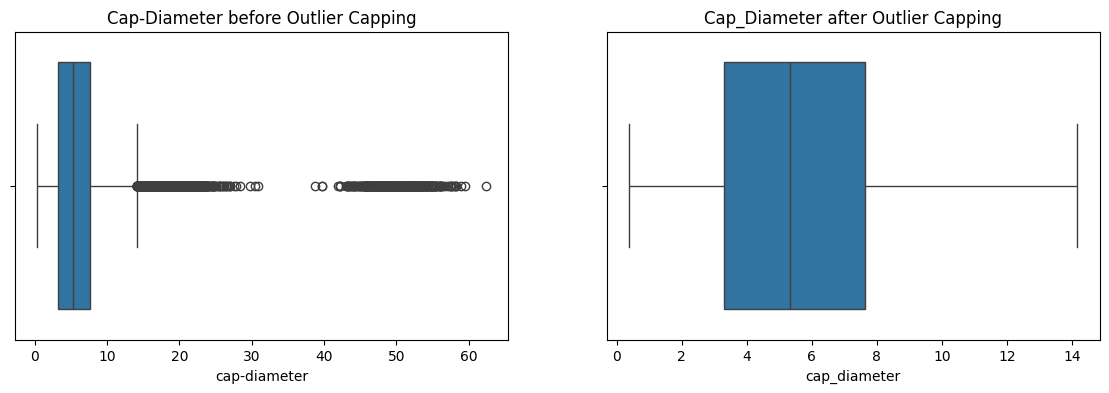

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x = df["cap-diameter"])
plt.title("Cap-Diameter before Outlier Capping")

plt.subplot(1,2,2)
sns.boxplot(x = df["cap_diameter"])
plt.title("Cap_Diameter after Outlier Capping")

plt.show()

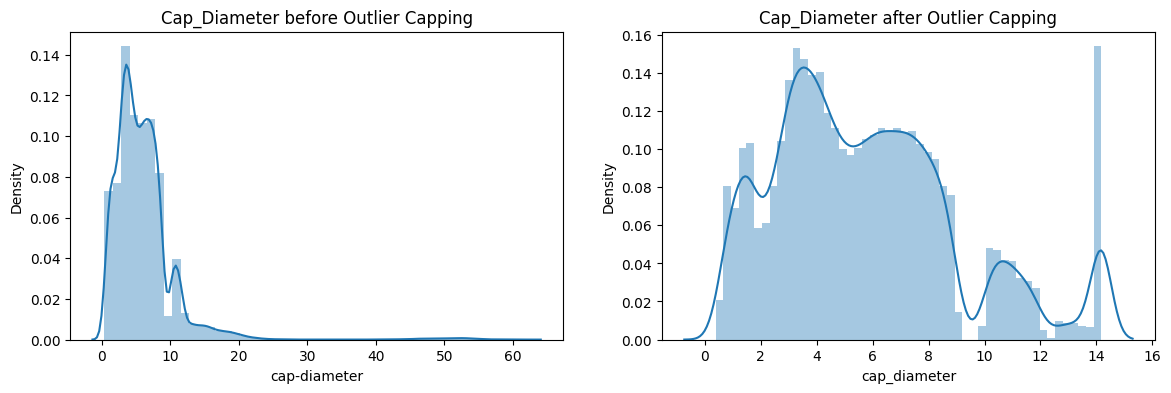

In [45]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.distplot(df["cap-diameter"])
plt.title("Cap_Diameter before Outlier Capping")

plt.subplot(1,2,2)
sns.distplot(df["cap_diameter"])
plt.title("Cap_Diameter after Outlier Capping")

plt.show()

**Stem Height**

In [244]:
percent_25 = df["stem-height"].quantile(0.25)
percent_75 = df["stem-height"].quantile(0.75)
IQR = percent_75 - percent_25
print(f"25th Percentile of stem-height is : {percent_25}")
print()
print(f"75th Percentile of stem-height is : {percent_75}")
print()
print(f"IQR of stem-height is : {IQR}")

lower_limit  = percent_25 - 1.5 * IQR
upper_limit = percent_75 + 1.5 * IQR
print(f"Lower Limit of stem-height is : {lower_limit}")
print()
print(f"Upper Limit of stem-height is : {upper_limit}")

25th Percentile of stem-height is : 4.53

75th Percentile of stem-height is : 7.45

IQR of stem-height is : 2.92
Lower Limit of stem-height is : 0.15000000000000036

Upper Limit of stem-height is : 11.83


In [245]:
df["stem_height"] = np.where(df["stem-height"] > upper_limit , upper_limit , 
                          np.where(df["stem-height"] < lower_limit , lower_limit , 
                          df["stem-height"] ))
df.describe()

,cap-diameter,stem-height,stem-width,cap_diameter,stem_height
count,54696.000000,54696.000000,54696.000000,54696.000000,54696.000000
mean,6.121649,6.392641,11.040549,5.777131,6.166325
std,5.070500,3.280002,9.536469,3.307675,2.497328
min,0.380000,0.000000,0.000000,0.380000,0.150000
25%,3.300000,4.530000,4.630000,3.300000,4.530000
50%,5.320000,5.810000,8.890000,5.320000,5.810000
75%,7.650000,7.450000,14.690000,7.650000,7.450000
max,62.340000,33.920000,103.910000,14.175000,11.830000


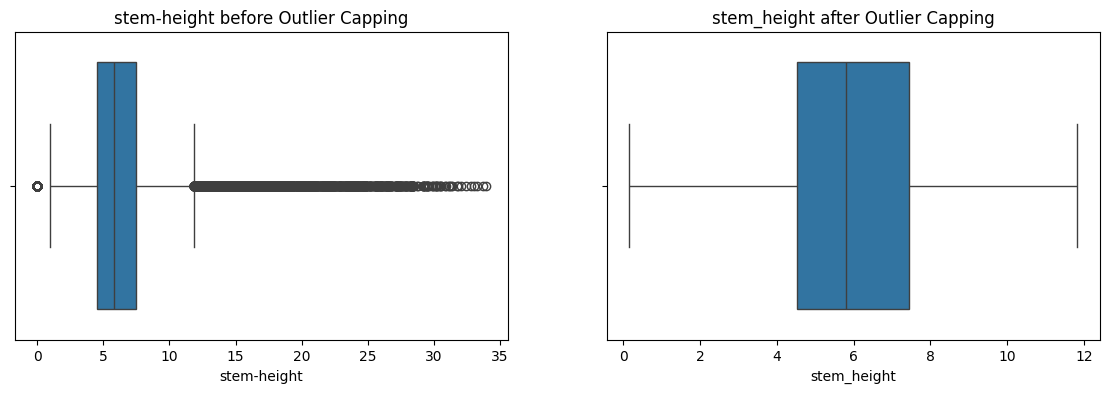

In [246]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x = df["stem-height"])
plt.title("stem-height before Outlier Capping")

plt.subplot(1,2,2)
sns.boxplot(x = df["stem_height"])
plt.title("stem_height after Outlier Capping")

plt.show()

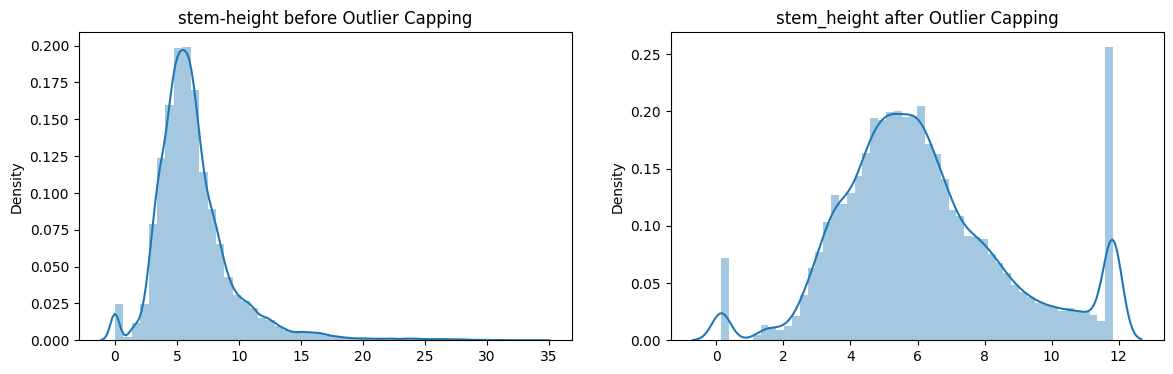

In [49]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(x = df["stem-height"])
plt.title("stem-height before Outlier Capping")

plt.subplot(1,2,2)
sns.distplot(x = df["stem_height"])
plt.title("stem_height after Outlier Capping")

plt.show()

**Stem-Width**

In [247]:
percent_25 = df["stem-width"].quantile(0.25)
percent_75 = df["stem-width"].quantile(0.75)
IQR = percent_75 - percent_25
print(f"25th Percentile of stem-width is : {percent_25}")
print()
print(f"75th Percentile of stem-width is : {percent_75}")
print()
print(f"IQR of stem-width is : {IQR}")

lower_limit  = percent_25 - 1.5 * IQR
upper_limit = percent_75 + 1.5 * IQR
print(f"Lower Limit of stem-width is : {lower_limit}")
print()
print(f"Upper Limit of stem-width is : {upper_limit}")

25th Percentile of stem-width is : 4.63

75th Percentile of stem-width is : 14.69

IQR of stem-width is : 10.059999999999999
Lower Limit of stem-width is : -10.459999999999997

Upper Limit of stem-width is : 29.779999999999998


In [248]:
df["stem_width"] = np.where(df["stem-width"] > upper_limit , upper_limit , 
                          np.where(df["stem-width"] < lower_limit , lower_limit , 
                          df["stem-width"] ))
df.describe()

,cap-diameter,stem-height,stem-width,cap_diameter,stem_height,stem_width
count,54696.000000,54696.000000,54696.000000,54696.000000,54696.000000,54696.000000
mean,6.121649,6.392641,11.040549,5.777131,6.166325,10.546971
std,5.070500,3.280002,9.536469,3.307675,2.497328,7.527095
min,0.380000,0.000000,0.000000,0.380000,0.150000,0.000000
25%,3.300000,4.530000,4.630000,3.300000,4.530000,4.630000
50%,5.320000,5.810000,8.890000,5.320000,5.810000,8.890000
75%,7.650000,7.450000,14.690000,7.650000,7.450000,14.690000
max,62.340000,33.920000,103.910000,14.175000,11.830000,29.780000


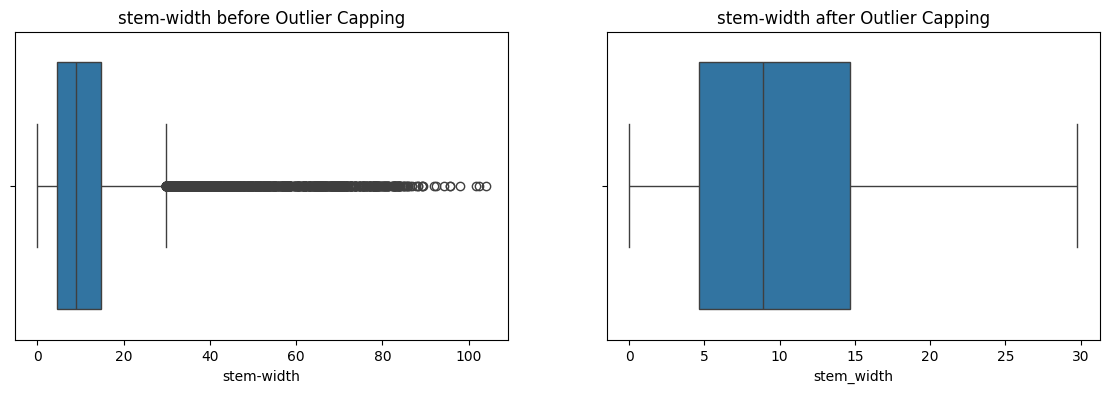

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x = df["stem-width"])
plt.title("stem-width before Outlier Capping")

plt.subplot(1,2,2)
sns.boxplot(x = df["stem_width"])
plt.title("stem-width after Outlier Capping")

plt.show()

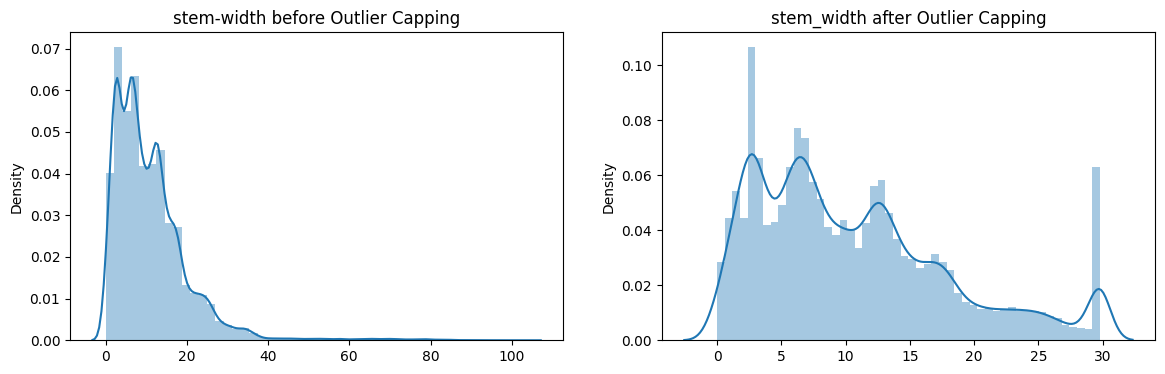

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(x = df["stem-width"])
plt.title("stem-width before Outlier Capping")

plt.subplot(1,2,2)
sns.distplot(x = df["stem_width"])
plt.title("stem_width after Outlier Capping")

plt.show()

**Now we remove Cap the Outlier data with Normal Scale we use the new data hereafter**

In [249]:
df.drop(columns = ["cap-diameter" , "stem-width" , "stem-height"], axis = 1 , inplace = True) 
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color',
       'has-ring', 'ring-type', 'habitat', 'season', 'cap_diameter',
       'stem_height', 'stem_width'],
      dtype='object')

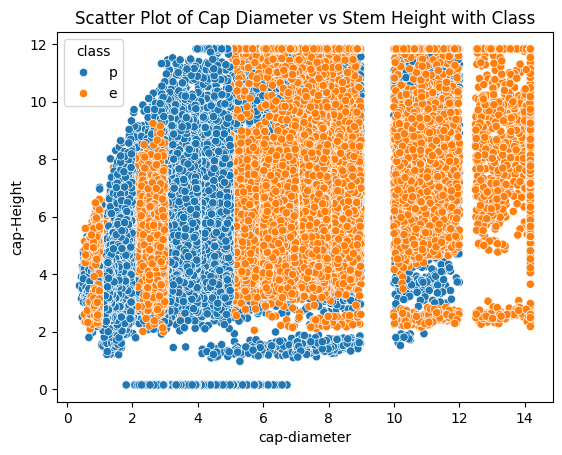

In [55]:
sns.scatterplot(data = df , x = "cap_diameter" ,  y = "stem_height", hue = "class")
plt.xlabel("cap-diameter")
plt.ylabel("cap-Height")
plt.title("Scatter Plot of Cap Diameter vs Stem Height with Class")
plt.show()

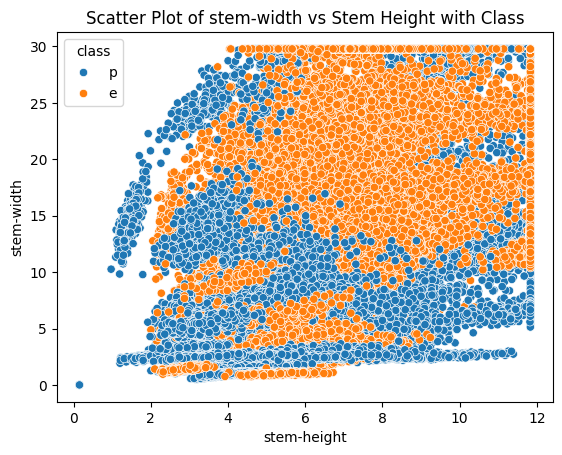

In [103]:
sns.scatterplot(data = df , x = "stem_height" ,  y = "stem_width", hue = "class")
plt.xlabel("stem-height")
plt.ylabel("stem-width")
plt.title("Scatter Plot of stem-width vs Stem Height with Class")
plt.show()

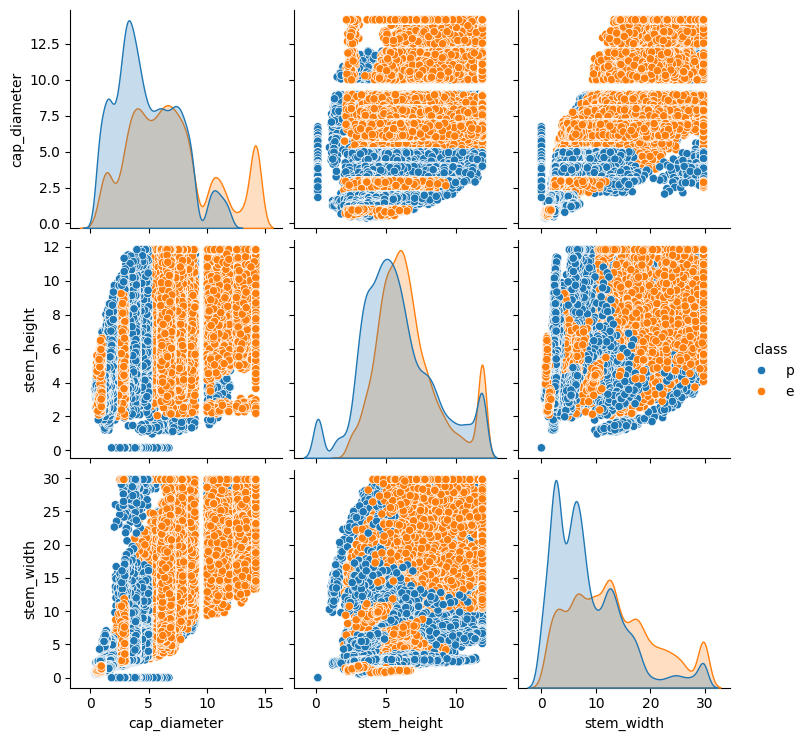

In [104]:
sns.pairplot(data=df[["cap_diameter" , "stem_height" , "stem_width" , "class"]] , hue = "class")

**Eventhough its Outlier Data Using Visualization  we find that where Width & Height are Larger & Higher that is Edible Plant**
- It Helps the model to identify the Pattern Correctly

In [250]:
df["class"] = df["class"].replace({"p" : 0 , "e" : 1})

In [251]:
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,cap_diameter,stem_height,stem_width
0,0,x,h,o,f,e,w,w,t,g,d,w,11.46,11.83,18.39
3,0,x,h,o,f,e,w,w,t,g,d,a,11.17,11.83,16.12
6,0,x,h,e,f,e,w,w,t,p,d,a,11.35,11.83,15.39
9,0,f,g,o,f,e,w,w,t,g,d,u,11.02,11.83,16.02
12,0,f,g,e,f,e,w,w,t,g,d,u,12.00,11.83,16.23


Correlation Matrix:
              cap_diameter  stem_height  stem_width     class
cap_diameter      1.000000     0.542307    0.801896  0.301381
stem_height       0.542307     1.000000    0.487438  0.149311
stem_width        0.801896     0.487438    1.000000  0.294518
class             0.301381     0.149311    0.294518  1.000000


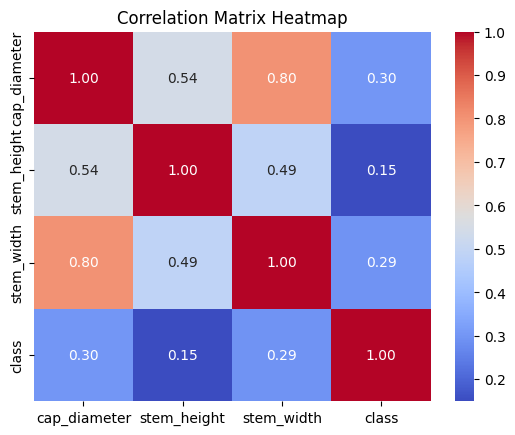

In [57]:
# Calculate the correlation matrix for all variables
correlation_matrix = df[["cap_diameter" , "stem_height" , "stem_width" , "class"]].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Cap_diameter & Stem_width are Highly Correlated we drop stem_width later for the model building**

In [58]:
df.describe()

,class,cap_diameter,stem_height,stem_width
count,54696.000000,54696.000000,54696.000000,54696.000000
mean,0.457456,5.777131,6.166325,10.546971
std,0.498191,3.307675,2.497328,7.527095
min,0.000000,0.380000,0.150000,0.000000
25%,0.000000,3.300000,4.530000,4.630000
50%,0.000000,5.320000,5.810000,8.890000
75%,1.000000,7.650000,7.450000,14.690000
max,1.000000,14.175000,11.830000,29.780000


## Handle Categorical Columns

In [59]:
df.select_dtypes(include='object').head()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season
0,x,h,o,f,e,w,w,t,g,d,w
3,x,h,o,f,e,w,w,t,g,d,a
6,x,h,e,f,e,w,w,t,p,d,a
9,f,g,o,f,e,w,w,t,g,d,u
12,f,g,e,f,e,w,w,t,g,d,u


In [52]:
df.shape

(502863, 15)

In [53]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,2.522524,x,h,o,f,e,w,2.921009,2.964757,w,t,g,d,w
1,0,2.522524,x,h,o,f,e,w,2.921009,2.964757,w,t,g,d,w
2,0,2.522524,x,h,o,f,e,w,2.921009,2.964757,w,t,g,d,w
3,0,2.498974,x,h,o,f,e,w,2.858766,2.840247,w,t,g,d,a
4,0,2.498974,x,h,o,f,e,w,2.858766,2.840247,w,t,g,d,a


In [60]:
col= df.select_dtypes(include='object').columns
col

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

In [61]:
for i in set(df["does-bruise-or-bleed"]):
  print(df[df["does-bruise-or-bleed"] == i]["class"].value_counts())
  print(f"-"*200)

class
1    4205
0    4142
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
class
0    25533
1    20816
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [62]:
no_specific_item = []
for column in col:
  print(f"This Column is : {column} which contains {len(set(df[column]))} of items")
  no_specific_item.append(len(set(df[column])))
  for val in set(df[column]):
    print(f"Specific values is {val}")
    print(df[df[column] == val]["class"].value_counts())
  print("-"*150)


This Column is : cap-shape which contains 7 of items
Specific values is o
class
0    2340
1     788
Name: count, dtype: int64
Specific values is s
class
0    3196
1    2952
Name: count, dtype: int64
Specific values is c
class
0    1041
1     774
Name: count, dtype: int64
Specific values is p
class
1    1405
0     969
Name: count, dtype: int64
Specific values is f
class
1    5906
0    5803
Name: count, dtype: int64
Specific values is x
class
1    11938
0    11916
Name: count, dtype: int64
Specific values is b
class
0    4410
1    1258
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
This Column is : cap-surface which contains 11 of items
Specific values is s
class
1    6758
0    2816
Name: count, dtype: int64
Specific values is g
class
0    4466
1    1961
Name: count, dtype: int64
Specific values is w
class
0    1272
1     852
Name: count, dtype: int64
Specific

**Check the column of has_ring & has_ring_type**

In [63]:
df[df["has-ring"] == "f"]["ring-type"].value_counts()

ring-type
f    41534
Name: count, dtype: int64

In [64]:
df[df["has-ring"] == "t"]["ring-type"].value_counts()

ring-type
e    3120
z    3109
f    2152
r    1488
l    1315
p     821
g     804
m     353
Name: count, dtype: int64

**Instead of 2 columns we use only ring_type**

In [252]:
df.drop(columns=["has-ring"] , inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,ring-type,habitat,season,cap_diameter,stem_height,stem_width
0,0,x,h,o,f,e,w,w,g,d,w,11.46,11.83,18.39
3,0,x,h,o,f,e,w,w,g,d,a,11.17,11.83,16.12
6,0,x,h,e,f,e,w,w,p,d,a,11.35,11.83,15.39
9,0,f,g,o,f,e,w,w,g,d,u,11.02,11.83,16.02
12,0,f,g,e,f,e,w,w,g,d,u,12.00,11.83,16.23


**Here we use [does-bruise-or-bleed  , season] for One hot Encoder because all the columns are nominal but we cant create OneHotEncoder for more than 5 class in a Column because it create sparse matrix**

## Handling Categorical Data

In [253]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [120]:
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,ring-type,habitat,season,cap_diameter,stem_height,stem_width
0,p,x,h,o,f,e,w,w,g,d,w,11.46,11.83,18.39
3,p,x,h,o,f,e,w,w,g,d,a,11.17,11.83,16.12
6,p,x,h,e,f,e,w,w,p,d,a,11.35,11.83,15.39
9,p,f,g,o,f,e,w,w,g,d,u,11.02,11.83,16.02
12,p,f,g,e,f,e,w,w,g,d,u,12.00,11.83,16.23


In [254]:
onehot_encoder = OneHotEncoder(drop = "first" , dtype = int ,handle_unknown='ignore' , sparse=False)
onehot_encoder

OneHotEncoder(drop='first', dtype=<class 'int'>, handle_unknown='ignore',
              sparse=False)

In [255]:
oneHot_cols = ["does-bruise-or-bleed"  , "season"]
oneHot_cols

['does-bruise-or-bleed', 'season']

In [256]:
onehot_encoded = onehot_encoder.fit_transform(df[oneHot_cols])
onehot_encoded

array([[0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [124]:
onehot_encoder.get_feature_names_out() , onehot_encoder.feature_names_in_

(array(['does-bruise-or-bleed_t', 'season_s', 'season_u', 'season_w'],
       dtype=object),
 array(['does-bruise-or-bleed', 'season'], dtype=object))

In [257]:
df_onehot_train = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out())
df_onehot_train.head()

,does-bruise-or-bleed_t,season_s,season_u,season_w
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,1,0


In [126]:
df.shape , df_onehot_train.shape

((54696, 14), (54696, 4))

In [129]:
df.head(1)

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,ring-type,habitat,season,cap_diameter,stem_height,stem_width
0,p,x,h,o,f,e,w,w,g,d,w,11.46,11.83,18.39


In [128]:
## test to transform the Data
lst = [2.522524,	"x" , 	"h" , 	"o" , 	"f" , 	"e" ,	"w" , 	2.921009 ,	2.964757 ,	"w" ,	"g"	 , "d"	, "w"]
lst

[2.522524,
 'x',
 'h',
 'o',
 'f',
 'e',
 'w',
 2.921009,
 2.964757,
 'w',
 'g',
 'd',
 'w']

In [76]:
len(df.columns)

14

In [77]:
onehot_encoder.feature_names_in_

array(['does-bruise-or-bleed', 'season'], dtype=object)

In [78]:
df.columns[1:]

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'ring-type', 'habitat',
       'season', 'cap_diameter', 'stem_height', 'stem_width'],
      dtype='object')

In [130]:
def transform_OHencoder(lst: list):
  '''
    This Function will take the input as a List and transform with trained One Hot Encoder
    return : DataFrame
  '''
  from sklearn.preprocessing import OneHotEncoder  
  x_cols = ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'ring-type', 'habitat', 'season']
  d = dict()
  for i , j in zip(x_cols , lst):
    d[i] = [j]
  df = pd.DataFrame(d)
  ohe = onehot_encoder.transform(df[onehot_encoder.feature_names_in_])
  new_df = pd.DataFrame(ohe , columns = onehot_encoder.get_feature_names_out())
  df.drop(columns=onehot_encoder.feature_names_in_ , axis = 1 , inplace= True)
  new_df = pd.concat([df , new_df] , axis = 1)
  return new_df

transform_OHencoder(lst)

,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,ring-type,habitat,does-bruise-or-bleed_t,season_s,season_u,season_w
0,2.522524,x,h,o,e,w,2.921009,2.964757,w,g,d,0,0,0,1


In [80]:
onehot_encoder

OneHotEncoder(drop='first', dtype=<class 'int'>, handle_unknown='ignore',
              sparse=False, sparse_output=False)

In [442]:
with open('OneHotEncoder.pickle', 'wb') as file:
    pickle.dump(onehot_encoder, file)

In [131]:
df_onehot_train.head()

,does-bruise-or-bleed_t,season_s,season_u,season_w
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,1,0


In [157]:
df.isnull().sum() , df.shape , df_onehot_train.shape

(class                   0
 cap-shape               0
 cap-surface             0
 cap-color               0
 does-bruise-or-bleed    0
 gill-attachment         0
 gill-color              0
 stem-color              0
 ring-type               0
 habitat                 0
 season                  0
 cap_diameter            0
 stem_height             0
 stem_width              0
 dtype: int64,
 (54696, 14),
 (54696, 5))

In [158]:
df_onehot_train.head()

,does-bruise-or-bleed_t,season_s,season_u,season_w,merge
0,0,0,0,1,yes
1,0,0,0,0,yes
2,0,0,0,0,yes
3,0,0,1,0,yes
4,0,0,1,0,yes


In [258]:
df.reset_index(drop=True, inplace=True)
df_onehot_train.reset_index(drop=True, inplace=True)

In [259]:
df = pd.concat([df , df_onehot_train] , axis = 1  )
df.drop(columns= onehot_encoder.feature_names_in_ , axis = 1 , inplace = True)
df.shape 

(54696, 16)

In [260]:
df.shape

(54696, 16)

In [261]:
df.duplicated().sum()

635

In [165]:
df_onehot_train.shape

(54696, 5)

In [262]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [263]:
df.isnull().sum()

class                     0
cap-shape                 0
cap-surface               0
cap-color                 0
gill-attachment           0
gill-color                0
stem-color                0
ring-type                 0
habitat                   0
cap_diameter              0
stem_height               0
stem_width                0
does-bruise-or-bleed_t    0
season_s                  0
season_u                  0
season_w                  0
dtype: int64

In [264]:
df.head()

,class,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat,cap_diameter,stem_height,stem_width,does-bruise-or-bleed_t,season_s,season_u,season_w
0,0,x,h,o,e,w,w,g,d,11.46,11.83,18.39,0,0,0,1
1,0,x,h,o,e,w,w,g,d,11.17,11.83,16.12,0,0,0,0
2,0,x,h,e,e,w,w,p,d,11.35,11.83,15.39,0,0,0,0
3,0,f,g,o,e,w,w,g,d,11.02,11.83,16.02,0,0,1,0
4,0,f,g,e,e,w,w,g,d,12.00,11.83,16.23,0,0,1,0


**Lable Encoder**

In [265]:
df.select_dtypes(include='object').head()

,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat
0,x,h,o,e,w,w,g,d
1,x,h,o,e,w,w,g,d
2,x,h,e,e,w,w,p,d
3,f,g,o,e,w,w,g,d
4,f,g,e,e,w,w,g,d


In [266]:
df.select_dtypes(include='object').columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-color', 'stem-color', 'ring-type', 'habitat'],
      dtype='object')

In [267]:
demo = df.copy()

In [268]:
cap_shape_dict = {"o" : 0 , "s" : 1 , "c" : 2 , "p" : 3  , "f" : 4 , "x" : 5 , "b" : 6}
cap_surface_dict = {'s': 0 , 'g': 1 , 'w': 2 , 'd': 3 , 'y':4 , 'h':5 , 'k':6 , 'e':7 , 't':8 , 'i':9 , 'l' :10}
cap_color_dict = {'o': 0 , 'g': 1 , 'r': 2 , 'p': 3 , 'y':4 , 'n':5 , 'u':6 , 'b':7 , 'e':8 , 'w':9 , 'k':10 , 'l' :11 }
gill_attachment_dict = {'s' : 0, 'd' :1, 'p':2, 'f':3, 'x':4, 'e':5, 'a':6}
gill_color_dict = {'o' : 0, 'g' : 1, 'r':2, 'p':3, 'f':4, 'y' :5, 'n':6, 'b':7, 'u':8, 'e':9, 'w':10, 'k':11}
stem_color_dict = {'b':0, 'e':1, 'f':2, 'g':3, 'k':4, 'l':5, 'n':6, 'o':7, 'p':8, 'r':9, 'u':10, 'w':11, 'y':12}
ring_type_dict = {'g' : 0, 'r':1, 'z':2, 'f':3, 'p':4, 'm':5, 'e':6, 'l':7}
habitat_dict = {'d':0, 'g':1, 'h':2, 'l':3, 'm':4, 'p':5, 'u':6, 'w':7}


In [269]:
df["cap-shape"] = df["cap-shape"].map(cap_shape_dict)
df["cap-surface"] = df["cap-surface"].map(cap_surface_dict)
df["cap-color"] = df["cap-color"].map(cap_color_dict)
df["gill-attachment"] = df["gill-attachment"].map(gill_attachment_dict)
df["gill-color"] = df["gill-color"].map(gill_color_dict)
df["stem-color"] = df["stem-color"].map(stem_color_dict)
df["ring-type"] = df["ring-type"].map(ring_type_dict)
df["habitat"] = df["habitat"].map(habitat_dict)

In [270]:
df.head()

,class,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat,cap_diameter,stem_height,stem_width,does-bruise-or-bleed_t,season_s,season_u,season_w
0,0,5,5,0,5,10,11,0,0,11.46,11.83,18.39,0,0,0,1
1,0,5,5,0,5,10,11,0,0,11.17,11.83,16.12,0,0,0,0
2,0,5,5,8,5,10,11,4,0,11.35,11.83,15.39,0,0,0,0
3,0,4,1,0,5,10,11,0,0,11.02,11.83,16.02,0,0,1,0
4,0,4,1,8,5,10,11,0,0,12.00,11.83,16.23,0,0,1,0


In [271]:
df.isnull().sum()

class                     0
cap-shape                 0
cap-surface               0
cap-color                 0
gill-attachment           0
gill-color                0
stem-color                0
ring-type                 0
habitat                   0
cap_diameter              0
stem_height               0
stem_width                0
does-bruise-or-bleed_t    0
season_s                  0
season_u                  0
season_w                  0
dtype: int64

**Correlation**

In [272]:
df.head()

,class,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat,cap_diameter,stem_height,stem_width,does-bruise-or-bleed_t,season_s,season_u,season_w
0,0,5,5,0,5,10,11,0,0,11.46,11.83,18.39,0,0,0,1
1,0,5,5,0,5,10,11,0,0,11.17,11.83,16.12,0,0,0,0
2,0,5,5,8,5,10,11,4,0,11.35,11.83,15.39,0,0,0,0
3,0,4,1,0,5,10,11,0,0,11.02,11.83,16.02,0,0,1,0
4,0,4,1,8,5,10,11,0,0,12.00,11.83,16.23,0,0,1,0


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54061 entries, 0 to 54695
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   class                   54061 non-null  int64  
 1   cap-shape               54061 non-null  int64  
 2   cap-surface             54061 non-null  int64  
 3   cap-color               54061 non-null  int64  
 4   gill-attachment         54061 non-null  int64  
 5   gill-color              54061 non-null  int64  
 6   stem-color              54061 non-null  int64  
 7   ring-type               54061 non-null  int64  
 8   habitat                 54061 non-null  int64  
 9   cap_diameter            54061 non-null  float64
 10  stem_height             54061 non-null  float64
 11  stem_width              54061 non-null  float64
 12  does-bruise-or-bleed_t  54061 non-null  int32  
 13  season_s                54061 non-null  int32  
 14  season_u                54061 non-null  int

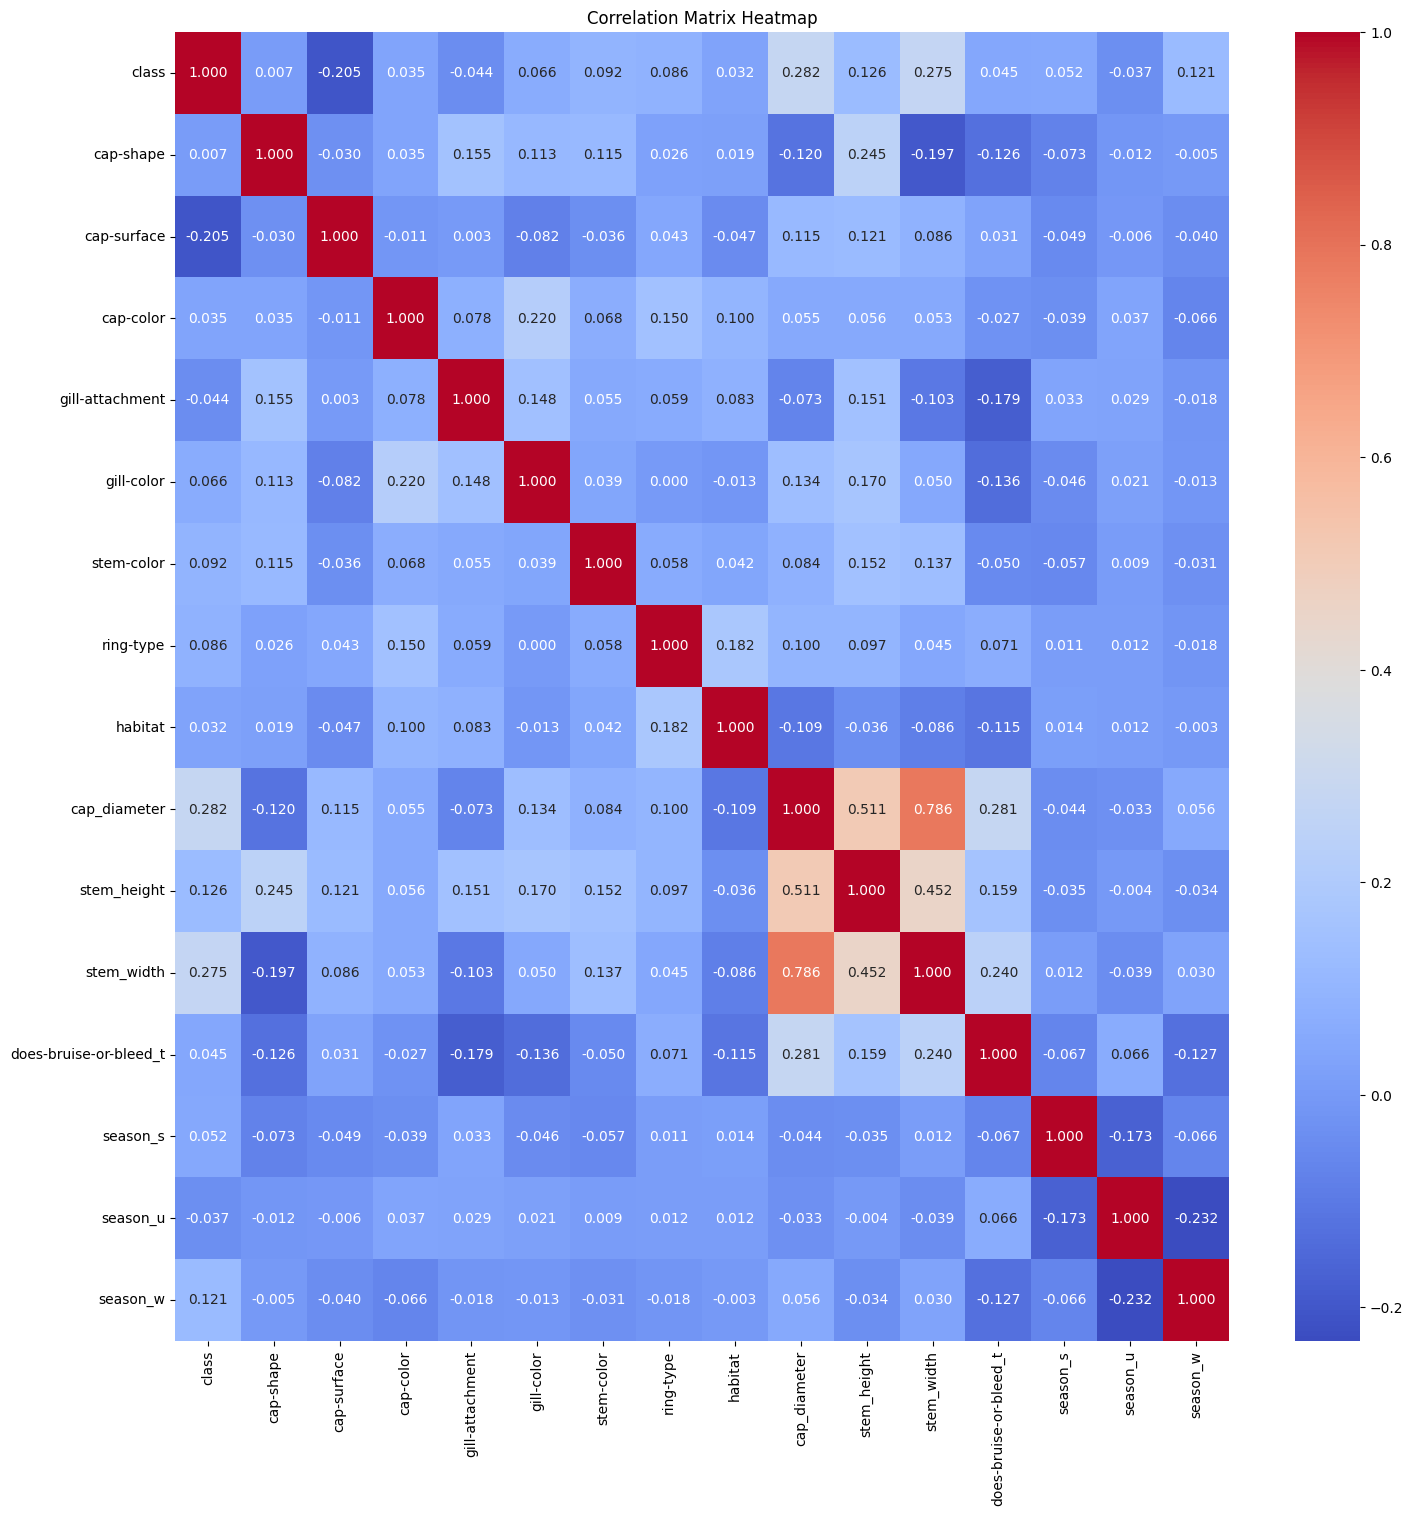

In [279]:
plt.figure(figsize=(17 ,17))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [285]:
df[["cap_diameter" , "stem_width" , "stem_height"]].skew()

cap_diameter    0.710318
stem_width      0.839617
stem_height     0.499800
dtype: float64

In [286]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
X = sm.add_constant(df[["cap_diameter", "stem_width", "stem_height"]])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data.iloc[1:])

       Variable       VIF
1  cap_diameter  2.840171
2    stem_width  2.638360
3   stem_height  1.364923


In [295]:
X = sm.add_constant(df)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                  Variable        VIF
0                    const  29.104251
1                    class   1.205015
2                cap-shape   1.269955
3              cap-surface   1.108049
4                cap-color   1.096238
5          gill-attachment   1.125101
6               gill-color   1.165423
7               stem-color   1.072271
8                ring-type   1.092647
9                  habitat   1.077886
10            cap_diameter   3.115105
11             stem_height   1.716618
12              stem_width   2.912879
13  does-bruise-or-bleed_t   1.220417
14                season_s   1.080390
15                season_u   1.104510
16                season_w   1.123742


**All the VIF values are below the 5 so no multicollienarity**

# Step 4 : Split & Scaling

In [296]:
x = df.iloc[: , 1:]
y = df[["class"]]

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [298]:
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size= 0.25 , random_state=22 , stratify=y)
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(40545, 15) (40545, 1) (13516, 15) (13516, 1)


In [299]:
y_train["class"].value_counts()

class
0    22255
1    18290
Name: count, dtype: int64

In [300]:
y_test["class"].value_counts()

class
0    7419
1    6097
Name: count, dtype: int64

**Feature Scaling**

In [325]:
scaler = StandardScaler()
scaler

StandardScaler()

In [326]:
scaler.fit(X_train)

StandardScaler()

In [327]:
x_train_scale = scaler.transform(X_train)
x_train_scale.shape

(40545, 15)

In [362]:
X_train.head()

,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,ring-type,habitat,does-bruise-or-bleed_t,season_s,season_u,season_w
292340,1.558145,6,7,11,0,11,1.903599,2.068128,7,1,1,0,0,0,0
434808,1.332366,2,10,5,1,7,2.005526,1.386294,6,1,3,0,0,1,0
398422,1.128171,0,2,11,0,5,1.961502,1.345472,6,1,4,0,1,0,0
480029,0.920283,0,3,5,0,5,1.638997,0.896088,6,1,0,0,1,0,0
343192,1.241269,5,7,2,1,10,1.121678,1.919859,11,1,1,0,0,0,0


In [364]:
with open('StandardScaler.pickle', 'wb') as file:
    pickle.dump(scaler, file)

## Step 5 : Model Building

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import  XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [302]:
from sklearn.metrics import classification_report , roc_curve , auc , accuracy_score

**Logistic Regression**

In [329]:
logit = LogisticRegression(class_weight='balanced', random_state=42 , solver='liblinear')
logit.fit(x_train_scale , y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [328]:
x_test_scale = scaler.transform(X_test)
x_test_scale.shape

(13516, 15)

In [330]:
y_train_pred = logit.predict(x_train_scale)
y_test_pred = logit.predict(x_test_scale)

In [331]:
print(classification_report(y_train , y_train_pred))
print(classification_report(y_test ,y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     22255
           1       0.63      0.61      0.62     18290

    accuracy                           0.66     40545
   macro avg       0.66      0.66      0.66     40545
weighted avg       0.66      0.66      0.66     40545

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      7419
           1       0.64      0.61      0.63      6097

    accuracy                           0.67     13516
   macro avg       0.67      0.67      0.67     13516
weighted avg       0.67      0.67      0.67     13516



**Random Forest**

In [303]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train , y_train)

RandomForestClassifier(oob_score=True)

In [304]:
rf.oob_score_

0.999358737205574

In [305]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [306]:
print(classification_report(y_train , y_train_pred))
print(classification_report(y_test ,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22255
           1       1.00      1.00      1.00     18290

    accuracy                           1.00     40545
   macro avg       1.00      1.00      1.00     40545
weighted avg       1.00      1.00      1.00     40545

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7419
           1       1.00      1.00      1.00      6097

    accuracy                           1.00     13516
   macro avg       1.00      1.00      1.00     13516
weighted avg       1.00      1.00      1.00     13516



### Predict some Data 

In [307]:
X_test.head(2) 

,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat,cap_diameter,stem_height,stem_width,does-bruise-or-bleed_t,season_s,season_u,season_w
42392,6,8,5,1,6,11,1,1,3.13,11.10,6.5,0,0,1,0
30873,5,4,4,4,6,11,3,0,4.48,6.33,4.4,0,0,1,0


In [308]:
y_test.head(20)

,class
42392,0
30873,1
8711,0
53383,0
12041,0
26212,1
33739,1
39526,0
31033,1
10340,0


In [309]:
rf.predict([X_test.values[0]])  , rf.predict_proba([X_test.values[0]])

(array([0], dtype=int64), array([[1., 0.]]))

In [313]:
rf.predict([X_test.values[2]])  , rf.predict_proba([X_test.values[2]])

(array([0], dtype=int64), array([[1., 0.]]))

In [311]:
rf.predict([X_test.values[17]])  , rf.predict_proba([X_test.values[17]])

(array([1], dtype=int64), array([[0., 1.]]))

In [312]:
rf.predict([X_test.values[18]])  , rf.predict_proba([X_test.values[18]])

(array([1], dtype=int64), array([[0., 1.]]))

**Predict Correctly**

**Feature Importance**

In [314]:
np.sum(rf.feature_importances_[:13])

0.9837603923192029

<Axes: ylabel='Density'>

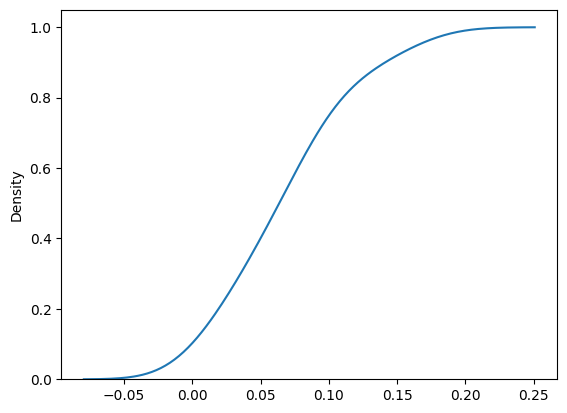

In [315]:
sns.kdeplot(rf.feature_importances_, cumulative=True)

**So All Features Give Correct equal Importance**

**Decision Tree**

In [316]:
decision_tree  = DecisionTreeClassifier(max_depth=15)
decision_tree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=15)

In [317]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

In [318]:
print(classification_report(y_train , y_train_pred))
print(classification_report(y_test ,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22255
           1       1.00      1.00      1.00     18290

    accuracy                           1.00     40545
   macro avg       1.00      1.00      1.00     40545
weighted avg       1.00      1.00      1.00     40545

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7419
           1       0.99      0.99      0.99      6097

    accuracy                           0.99     13516
   macro avg       0.99      0.99      0.99     13516
weighted avg       0.99      0.99      0.99     13516



In [320]:
decision_tree.predict([X_test.values[17]])  , decision_tree.predict_proba([X_test.values[17]])

(array([1], dtype=int64), array([[0., 1.]]))

**XGBoost**

In [332]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss')

In [333]:
xgb.fit(x_train_scale , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [334]:
y_train_pred = xgb.predict(x_train_scale)
y_test_pred = xgb.predict(x_test_scale)

In [335]:
print(classification_report(y_train , y_train_pred))
print(classification_report(y_test ,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22255
           1       1.00      1.00      1.00     18290

    accuracy                           1.00     40545
   macro avg       1.00      1.00      1.00     40545
weighted avg       1.00      1.00      1.00     40545

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7419
           1       1.00      1.00      1.00      6097

    accuracy                           1.00     13516
   macro avg       1.00      1.00      1.00     13516
weighted avg       1.00      1.00      1.00     13516



In [337]:
xgb.predict([x_test_scale[1]])  , rf.predict_proba([x_test_scale[1]])

(array([1]), array([[0.56, 0.44]]))

## Accuracy Metrics

In [338]:
y_test_pred = logit.predict(x_test_scale)
log_acc = accuracy_score(y_test , y_test_pred)

y_test_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test , y_test_pred)

y_test_pred = xgb.predict(x_test_scale)
xgb_acc = accuracy_score(y_test , y_test_pred)

y_test_pred = decision_tree.predict(x_test_scale)
dt_acc = accuracy_score(y_test , y_test_pred)

In [339]:
list1 = ["Logistic-Regression","RandomForest","XG-Boost","DecisionTree"]
list2 = [log_acc, rf_acc,xgb_acc,dt_acc]
final_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy":list2})
print(final_accuracy)

           Method Used  Accuracy
0  Logistic-Regression  0.671278
1         RandomForest  0.999556
2             XG-Boost  0.999334
3         DecisionTree  0.548905


Axes(0.125,0.11;0.775x0.77)


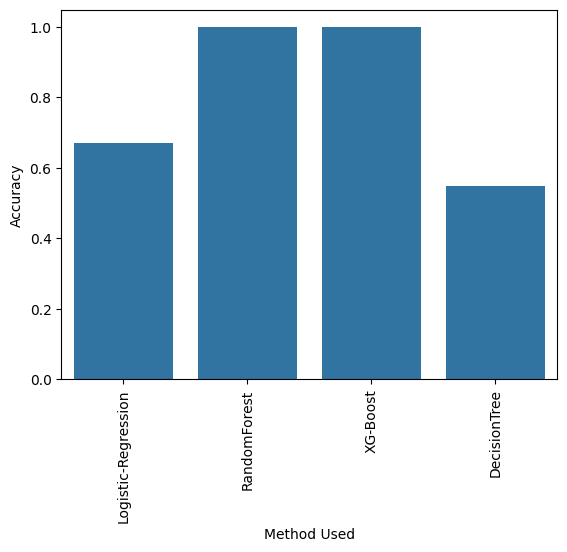

In [340]:
chart = sns.barplot(x='Method Used', y='Accuracy', data= final_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)
plt.show()

**Use Random Forest because its most Stable Model**

[13 12 14 11  7  6  2  0  5  4  9  3  8 10  1]
[ 2  0  1  3 13 10 12  4  5  8  9 11  6 14  7]


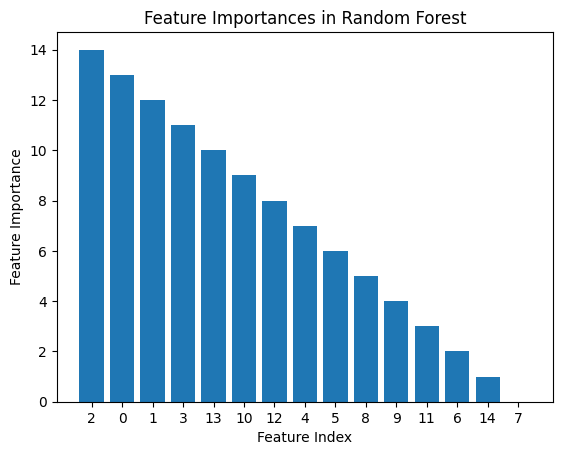

In [341]:
feature_importances = rf.feature_importances_.argsort()
print(feature_importances)

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]
print(indices)
# Plot feature importances
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

Text(0.5, 1.0, 'Random Forest Feature Importance')

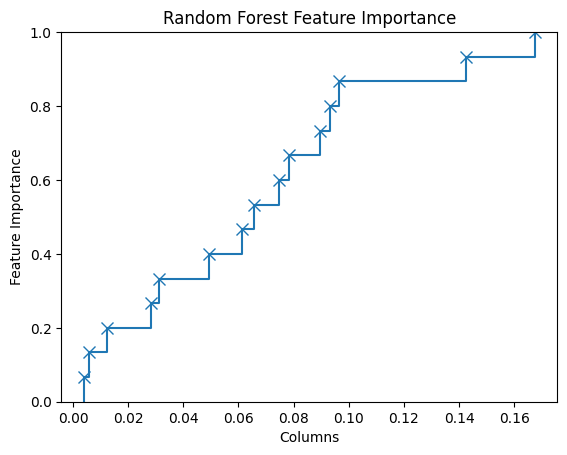

In [342]:
sns.ecdfplot(rf.feature_importances_, marker="x", markersize=8)
plt.xlabel('Columns')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')

**HyperParameter Tuning**

In [343]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [344]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]}
rf_model = RandomForestClassifier()


In [345]:
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train_scale, y_train)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 60}


In [349]:
rf_tune = RandomForestClassifier(bootstrap= False, max_depth= 20, max_features= "log2", min_samples_leaf= 3, min_samples_split= 6, n_estimators= 60)
rf_tune

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_leaf=3, min_samples_split=6,
                       n_estimators=60)

In [350]:
rf_tune.fit(X_train , y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_leaf=3, min_samples_split=6,
                       n_estimators=60)

In [351]:
y_pred_train_tune = rf_tune.predict(X_train)
y_pred_test_tune = rf_tune.predict(X_test)

In [352]:
print(classification_report(y_train , y_pred_train_tune))
print(classification_report(y_test ,y_pred_test_tune))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22255
           1       1.00      1.00      1.00     18290

    accuracy                           1.00     40545
   macro avg       1.00      1.00      1.00     40545
weighted avg       1.00      1.00      1.00     40545

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7419
           1       1.00      1.00      1.00      6097

    accuracy                           1.00     13516
   macro avg       1.00      1.00      1.00     13516
weighted avg       1.00      1.00      1.00     13516



In [353]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [354]:
y_test_pred = rf.predict(X_test)

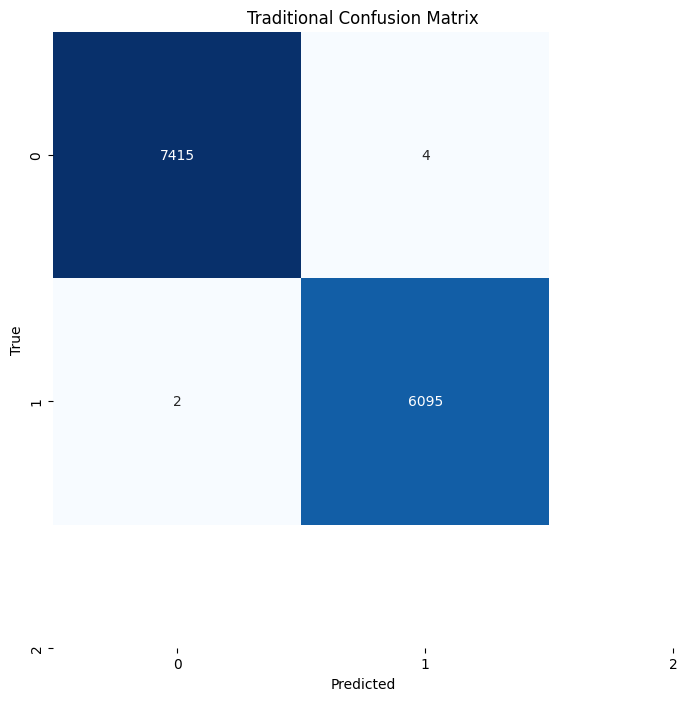

In [362]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test , y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Traditional Confusion Matrix")
plt.show()


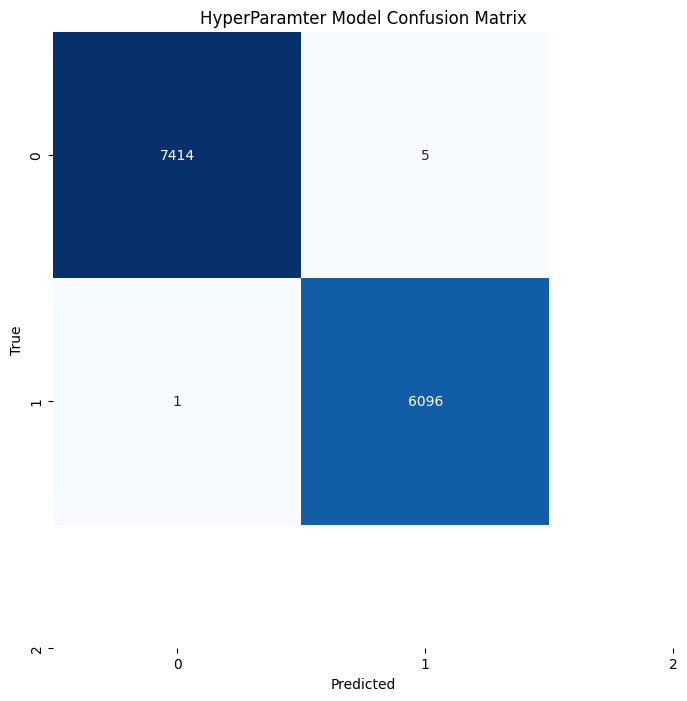

In [363]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test , y_pred_test_tune), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("HyperParamter Model Confusion Matrix")
plt.show()

In [364]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf , X_train , y_train , cv = 10)
testing_accuracy = cross_val_score(rf , X_test , y_test , cv=10)
print("Training Cross Validation")
print(training_accuracy)
print()
print("Testing Cross Validation")
print(testing_accuracy)

Training Cross Validation
[0.99876695 0.99901356 0.99950678 0.99950678 0.99926017 0.99950666
 1.         0.99950666 0.99950666 0.99950666]

Testing Cross Validation
[0.99852071 0.99926036 0.99852071 0.99778107 0.99852071 0.99556213
 0.99851962 0.99777942 0.99925981 0.99851962]


In [365]:
training_accuracy.mean() , testing_accuracy.mean()

(0.9994080894362604, 0.9982244140873077)

In [366]:
from sklearn.metrics import roc_auc_score , roc_curve

In [367]:
y_test_pred = rf.predict(X_test)

In [368]:
rf_roc_auc_score = roc_auc_score(y_test , y_test_pred)
rf_roc_auc_score ## cutt-off value

0.9995664068003544

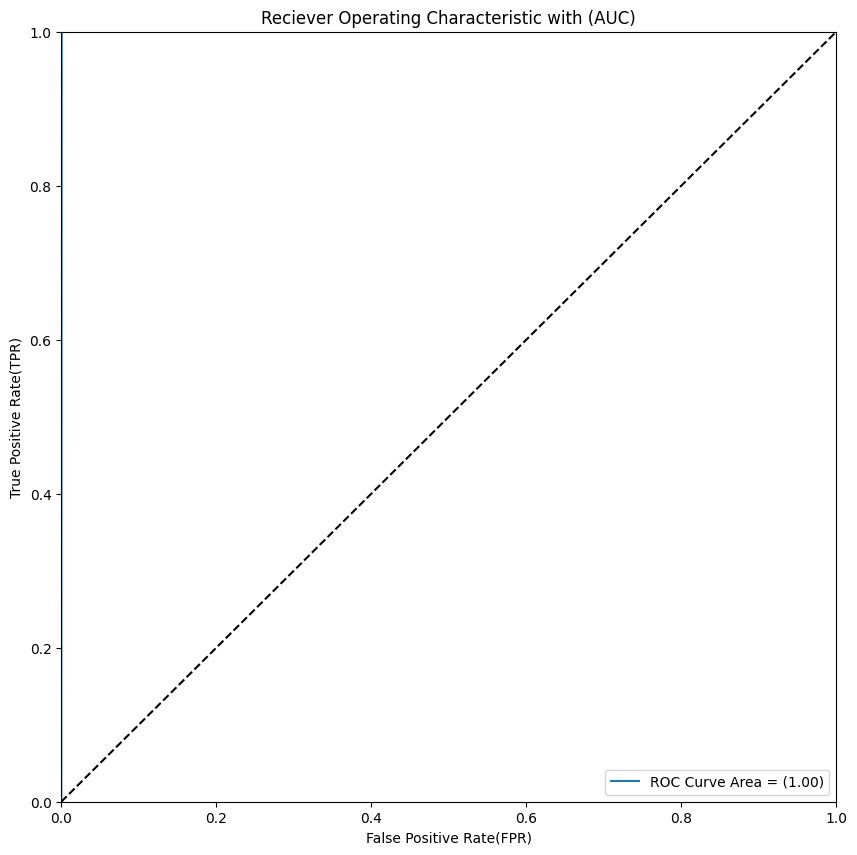

In [369]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,label = "ROC Curve Area = (%0.2f)"%rf_roc_auc_score)
plt.plot([0,1] , [0,1] ,'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Reciever Operating Characteristic with (AUC)")
plt.legend(loc = "lower right")
plt.show()

In [392]:
import joblib

In [393]:
joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [370]:
X_train.head()

,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat,cap_diameter,stem_height,stem_width,does-bruise-or-bleed_t,season_s,season_u,season_w
41531,5,9,8,1,9,1,3,0,3.45,4.12,5.64,0,0,0,0
39096,5,1,9,4,3,8,3,0,3.92,8.18,4.75,0,0,1,0
27267,5,5,4,4,5,11,3,0,6.50,6.96,15.20,1,0,1,0
37781,4,6,4,2,6,6,3,0,4.67,2.55,4.90,0,0,1,0
44670,4,2,5,1,6,6,3,0,2.67,3.35,5.95,1,0,0,0


In [371]:
X_train.shape

(40545, 15)

In [373]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-color', 'stem-color', 'ring-type', 'habitat', 'cap_diameter',
       'stem_height', 'stem_width', 'does-bruise-or-bleed_t', 'season_s',
       'season_u', 'season_w'],
      dtype='object')

## Pipeline

In [372]:
from sklearn.pipeline import Pipeline

In [388]:
def transform_OHencoder(lst: list):
  '''
    This Function will take the input as a List and transform with trained One Hot Encoder
    return : DataFrame
  '''
   
  x_cols = ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-color', 'stem-color', 'ring-type', 'habitat', 'cap_diameter',
       'stem_height', 'stem_width' , 'does-bruise-or-bleed' , 'season']
  d = dict()
  for i , j in zip(x_cols , lst):
    d[i] = [j]
  df = pd.DataFrame(d)
  if df["cap_diameter"][0] >15:
    df["cap_diameter"] = 15
  if df["stem_height"][0] > 12:
    df["stem_height"] = 12
  if df["stem_width"][0] > 29:
    df["stem_width"] = 15
  ohe = onehot_encoder.transform(df[onehot_encoder.feature_names_in_])
  new_df = pd.DataFrame(ohe , columns = onehot_encoder.get_feature_names_out())
  df.reset_index(drop=True, inplace=True)
  new_df.reset_index(drop=True, inplace=True)
  df.drop(columns=onehot_encoder.feature_names_in_ , axis = 1 , inplace= True)
  df = pd.concat([df , new_df] , axis = 1)
  cap_shape_dict = {"o" : 0 , "s" : 1 , "c" : 2 , "p" : 3  , "f" : 4 , "x" : 5 , "b" : 6}
  cap_surface_dict = {'s': 0 , 'g': 1 , 'w': 2 , 'd': 3 , 'y':4 , 'h':5 , 'k':6 , 'e':7 , 't':8 , 'i':9 , 'l' :10}
  cap_color_dict = {'o': 0 , 'g': 1 , 'r': 2 , 'p': 3 , 'y':4 , 'n':5 , 'u':6 , 'b':7 , 'e':8 , 'w':9 , 'k':10 , 'l' :11 }
  gill_attachment_dict = {'s' : 0, 'd' :1, 'p':2, 'f':3, 'x':4, 'e':5, 'a':6}
  gill_color_dict = {'o' : 0, 'g' : 1, 'r':2, 'p':3, 'f':4, 'y' :5, 'n':6, 'b':7, 'u':8, 'e':9, 'w':10, 'k':11}
  stem_color_dict = {'b':0, 'e':1, 'f':2, 'g':3, 'k':4, 'l':5, 'n':6, 'o':7, 'p':8, 'r':9, 'u':10, 'w':11, 'y':12}
  ring_type_dict = {'g' : 0, 'r':1, 'z':2, 'f':3, 'p':4, 'm':5, 'e':6, 'l':7 ,"c" :8}
  habitat_dict = {'d':0, 'g':1, 'h':2, 'l':3, 'm':4, 'p':5, 'u':6, 'w':7}
  df["cap-shape"] = df["cap-shape"].map(cap_shape_dict)
  df["cap-surface"] = df["cap-surface"].map(cap_surface_dict)
  df["cap-color"] = df["cap-color"].map(cap_color_dict)
  df["gill-attachment"] = df["gill-attachment"].map(gill_attachment_dict)
  df["gill-color"] = df["gill-color"].map(gill_color_dict)
  df["stem-color"] = df["stem-color"].map(stem_color_dict)
  df["ring-type"] = df["ring-type"].map(ring_type_dict)
  df["habitat"] = df["habitat"].map(habitat_dict)
  result = rf.predict(df.values)[0]
  if result ==0:
    print("Poisonous")
  else:
    print("Edible")
  return df


In [ ]:
['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-color', 'stem-color', 'ring-type', 'habitat', 'cap_diameter',
       'stem_height', 'stem_width' , 'does-bruise-or-bleed' , 'season']

In [389]:
input_arr = ["c" , "g" , "n" , "a" , "g" , "g" , "f" ,"l", 1.56 ,5.09,1.56 , "f" , "u"]
transform_OHencoder(input_arr)

Edible


,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat,cap_diameter,stem_height,stem_width,does-bruise-or-bleed_t,season_s,season_u,season_w
0,2,1,5,6,1,3,3,3,1.56,5.09,1.56,0,0,1,0


In [379]:
onehot_encoder.feature_names_in_

array(['does-bruise-or-bleed', 'season'], dtype=object)

In [391]:
encoder = Pipeline(steps=[])

In [ ]:
encoder.predict